# CAPSTONE PROJECT -1

DATASET : WALMART SALES DATASET

Problem Statement 1:
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years.

# SECTION I - IMPORTING LIBRARIES

In [3]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr



In [4]:
# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

In [5]:
#For date-time
import math
from datetime import datetime
from datetime import timedelta

In [13]:
# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import missingno as msno

In [7]:
#FOR ARIMA 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [12]:
#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
#plotly configuration
import plotly.express as px
import plotly.graph_objects as go

In [9]:
#For warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Do some statistics

from scipy import sparse
import scipy.stats as ss
import math

In [16]:
#SCALING
from sklearn.preprocessing import StandardScaler
## Performance measures
from sklearn.metrics import mean_squared_error

In [15]:
#For PROPHET ALGORITHIM
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly

# SECTION - II - Loading the dataset

In [18]:
walmart=pd.read_csv('Walmart.csv',parse_dates=["Date"])

In [19]:
#To retain the original ones am creating a copy and using this 

wm=walmart

# SECTION - III - DATA EXPLORATION

In [20]:
wm.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [21]:
wm.tail()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667

In [22]:
wm.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [25]:
wm.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [31]:
wm.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [29]:
wm.shape

(6435, 8)

In [32]:
wm.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [34]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [36]:
wm.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

# SECTION - 4 - Data Visualization

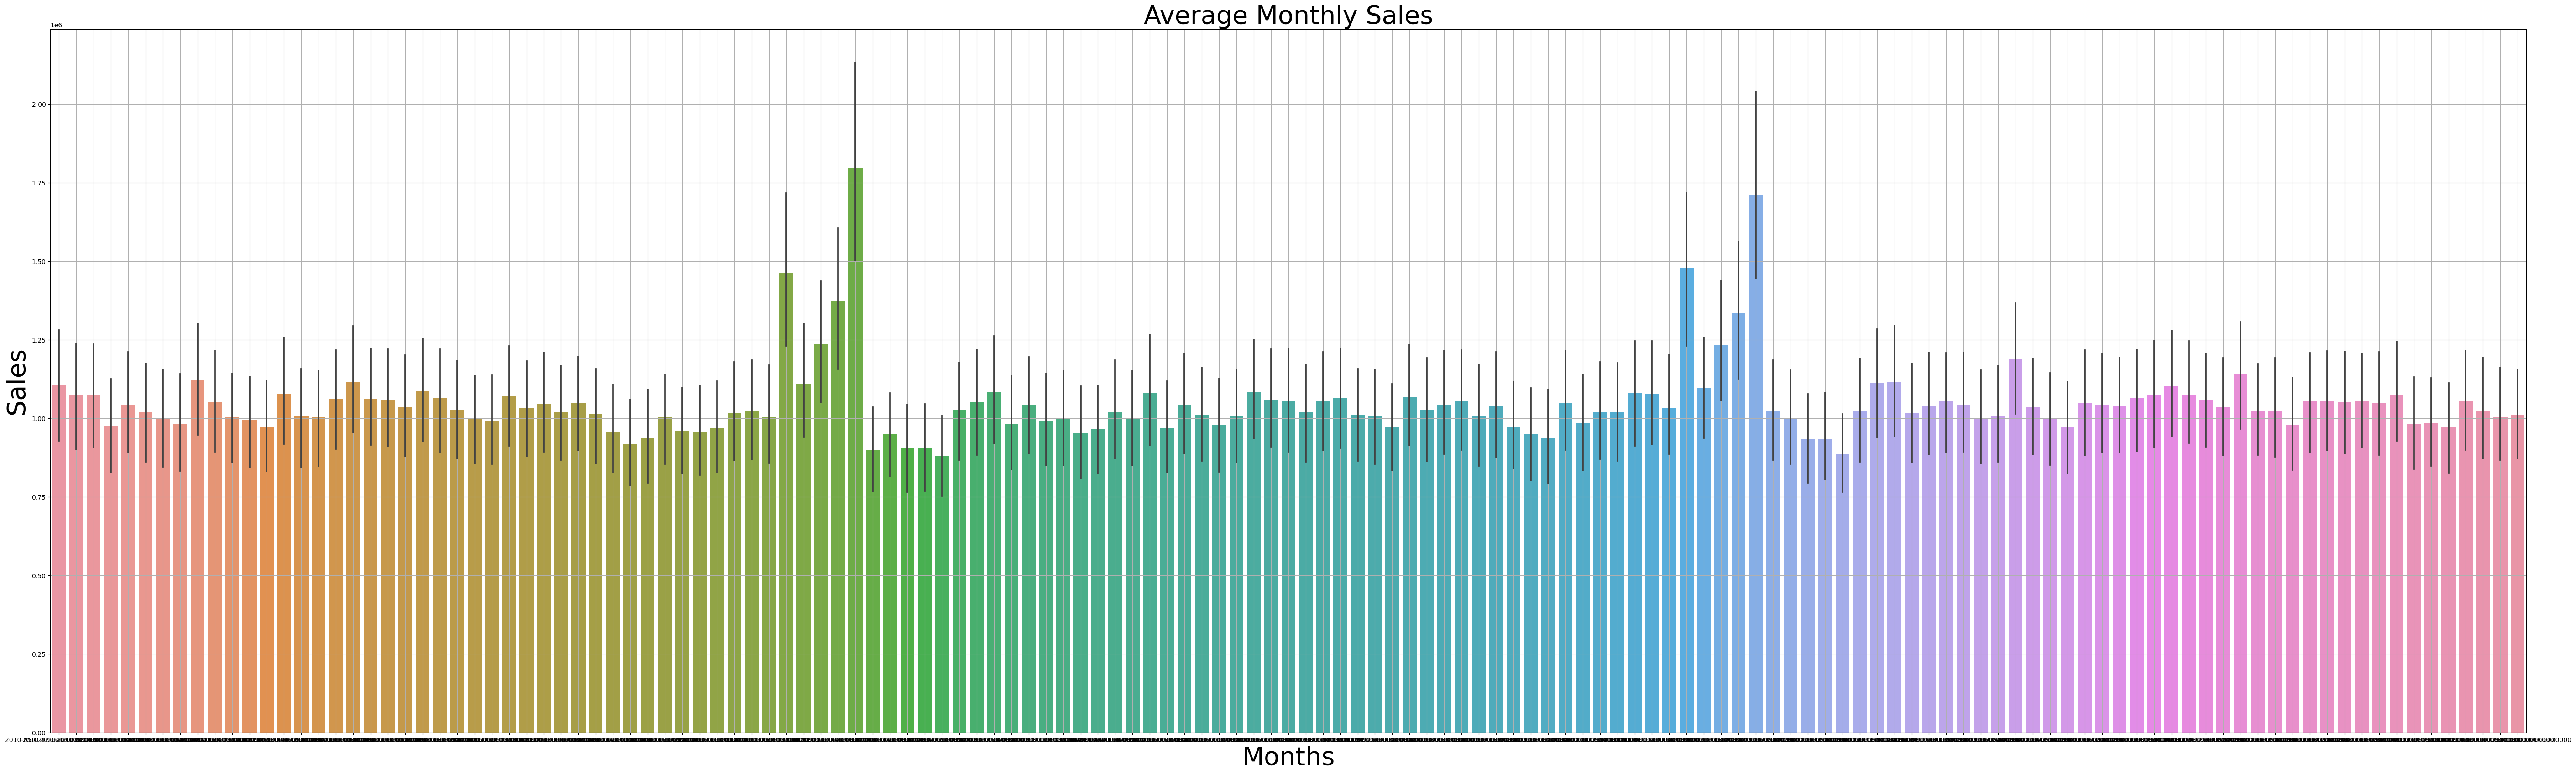

In [39]:
#Average Monthly Sales
plt.figure(figsize=(70,20))
sns.barplot(x='Date',y='Weekly_Sales',data=wm)
plt.ylabel('Sales',fontsize=40)
plt.xlabel('Months',fontsize=40)
plt.title('Average Monthly Sales',fontsize=40)
plt.grid()

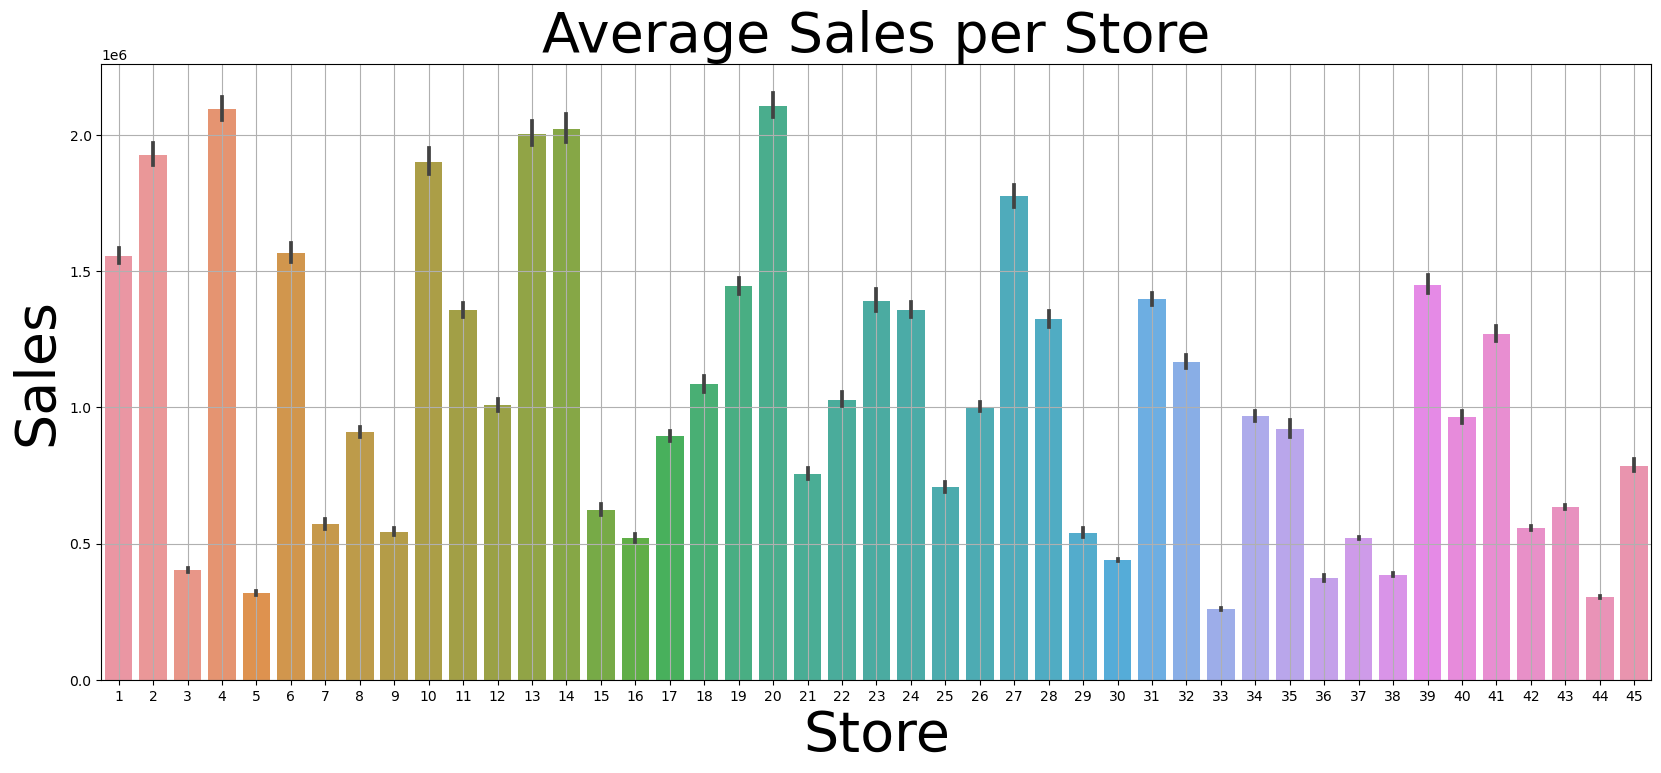

In [40]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=wm)
plt.grid()
plt.title('Average Sales per Store', fontsize=40)
plt.ylabel('Sales', fontsize=40)
plt.xlabel('Store', fontsize=40)
plt.show()

Text(0.5, 1.0, 'Holidays vs Weeklysales')

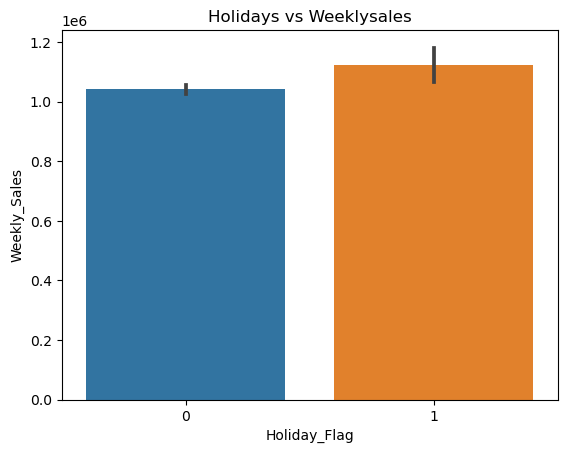

In [46]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=wm)
plt.title('Holidays vs Weeklysales')

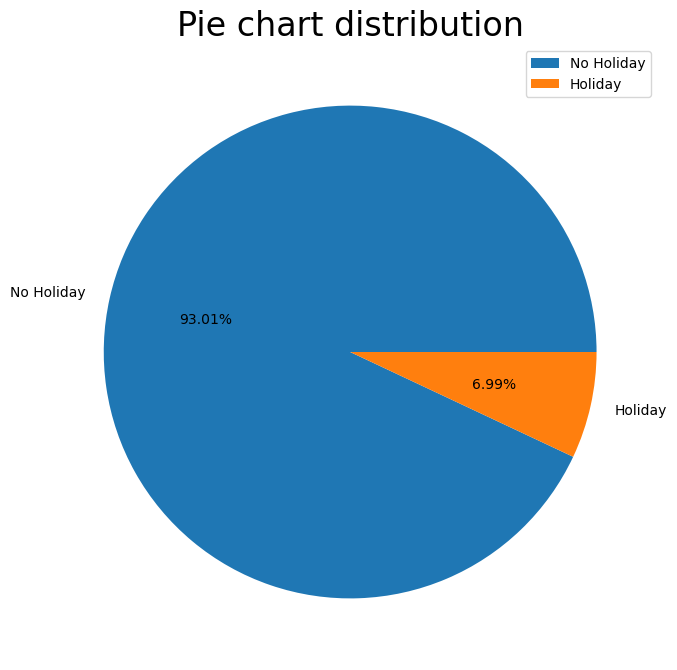

In [47]:
# Holiday Distribution
plt.figure(figsize=(8,8))
plt.pie(wm['Holiday_Flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=24)
plt.legend()
plt.show() 

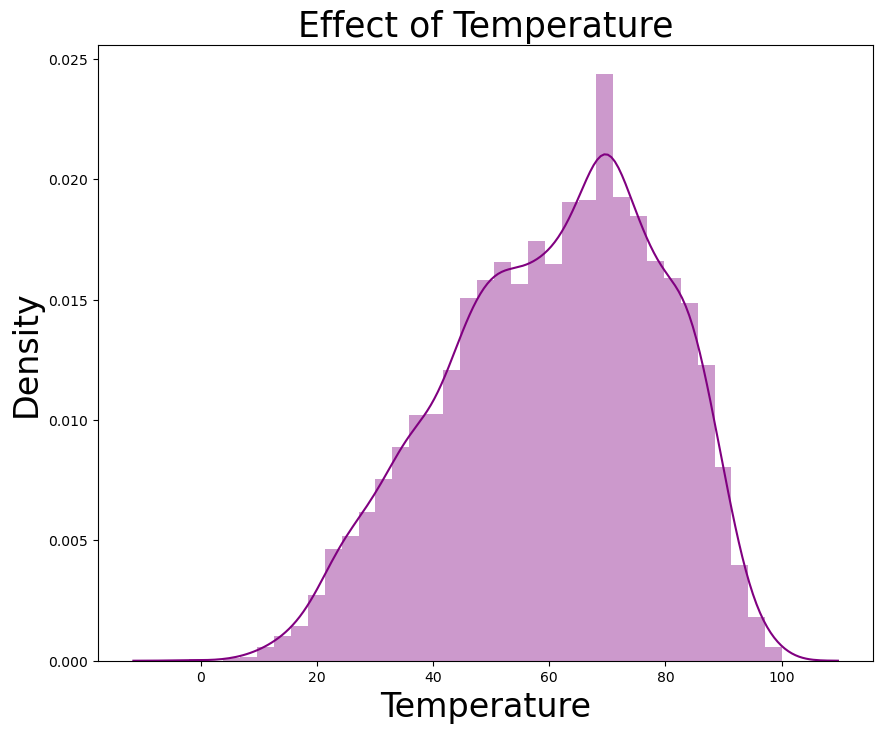

In [49]:
# Effect of Temperature on Sales
plt.figure(figsize=(10,8))
sns.distplot(wm['Temperature'],color='purple')
plt.title('Effect of Temperature',fontsize=25)
plt.xlabel('Temperature',fontsize=24)
plt.ylabel('Density',fontsize=24)
plt.show()

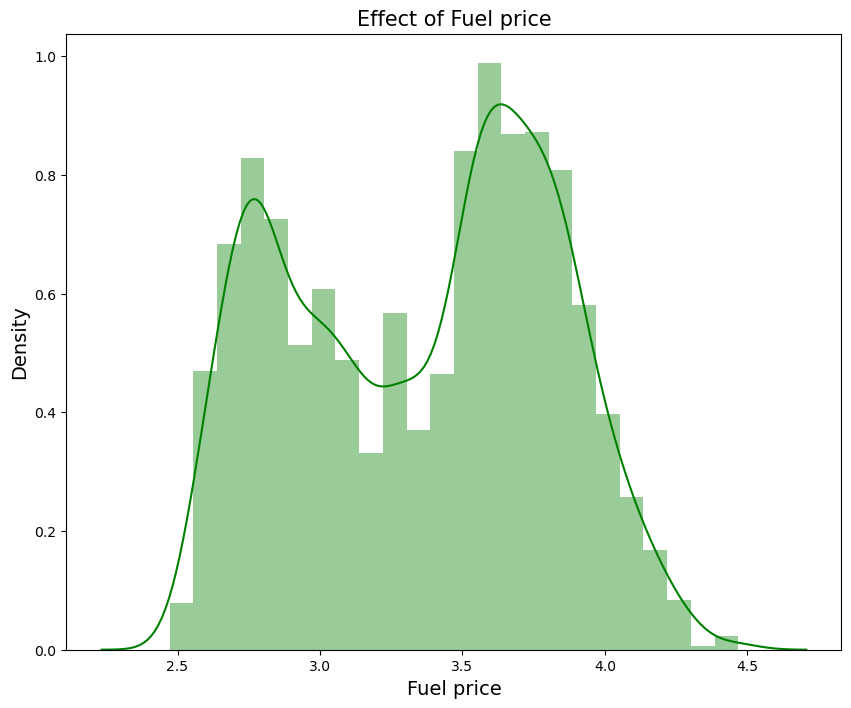

In [51]:
# Effect of Fuelprice on Sales
plt.figure(figsize=(10,8))
sns.distplot(wm['Fuel_Price'],color='green')
plt.title('Effect of Fuel price',fontsize=15)
plt.xlabel('Fuel price',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

Text(0.5, 1.0, 'Weekly Sales vs Temperature')

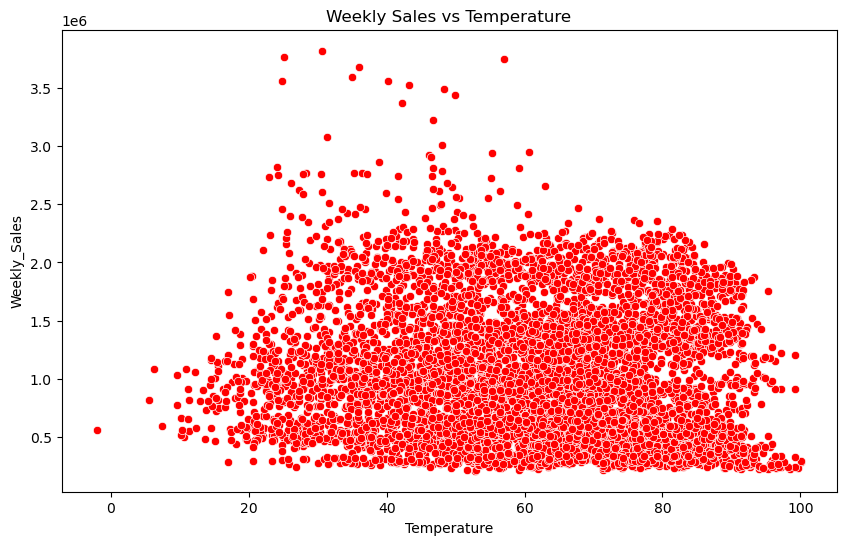

In [56]:
# Explore the relationship between Weekly_Sales and Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wm, x='Temperature', y='Weekly_Sales',color='red')
plt.title('Weekly Sales vs Temperature')

Text(0.5, 1.0, 'CPI vs Unemployment')

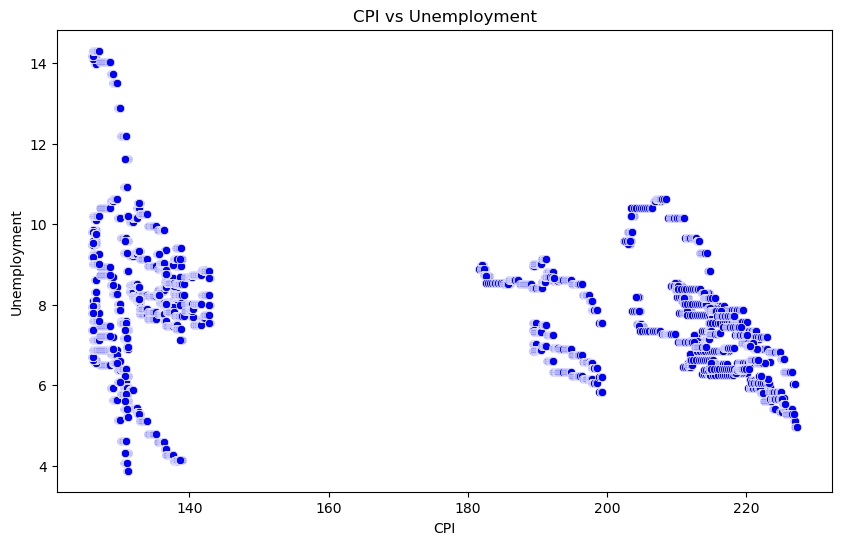

In [57]:
# Explore the relationship between CPI and Unemployment
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wm, x='CPI', y='Unemployment',color='blue')
plt.title('CPI vs Unemployment')

In [58]:
data=wm

Store = data.groupby(['Store']).agg({'Weekly_Sales':['mean','max','sum']})
Store[:5]

Weekly_Sales                          
               mean         max           sum
Store                                        
1      1.555264e+06  2387950.20  2.224028e+08
2      1.925751e+06  3436007.68  2.753824e+08
3      4.027044e+05   605990.41  5.758674e+07
4      2.094713e+06  3676388.98  2.995440e+08
5      3.180118e+05   507900.07  4.547569e+07

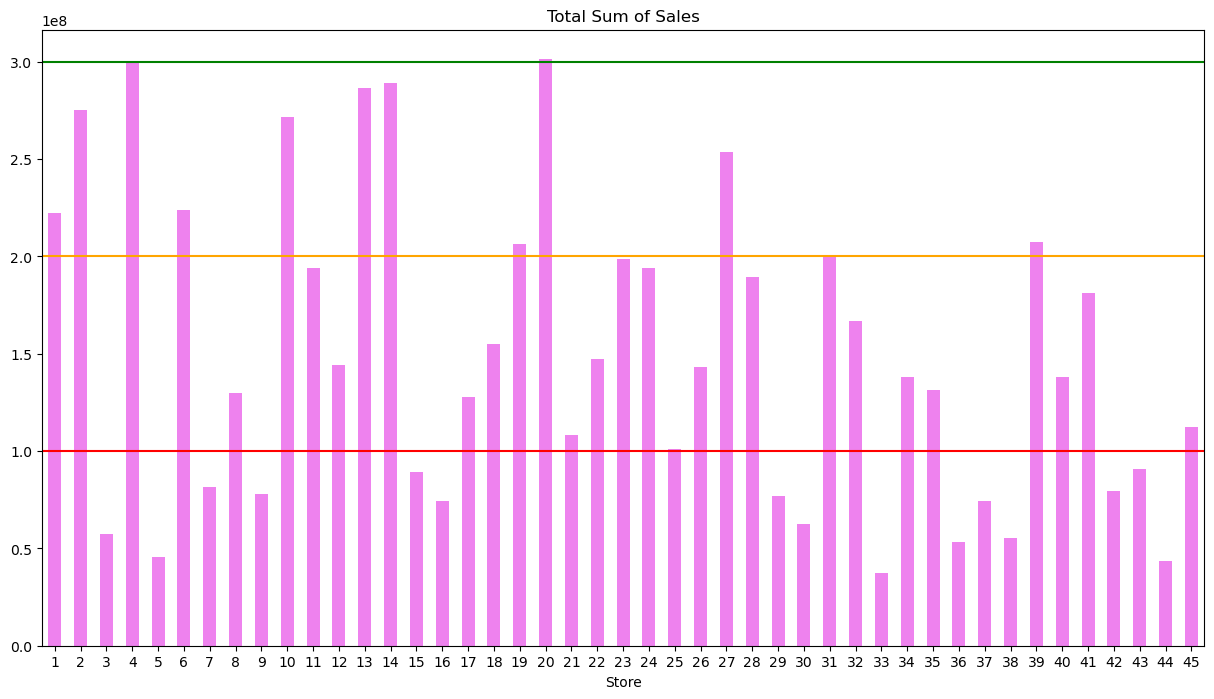

In [59]:
plt.figure(figsize = (15,8))
Store[('Weekly_Sales',  'sum')].plot(kind = 'bar',color = 'violet')
plt.xticks(rotation = 0)
plt.title('Total Sum of Sales')
plt.axhline(y=200000000,color = 'orange')
plt.axhline(y=100000000,color = 'red')
plt.axhline(y=300000000,color = 'green')
plt.show()

In [61]:
wm["Date"] = pd.to_datetime(wm["Date"]) # convert to datetime
wm['week'] =wm['Date'].dt.week
wm['month'] =wm['Date'].dt.month 
wm['year'] =wm['Date'].dt.year

In [62]:
wm.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [63]:
wm.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

In [82]:
wm['Day'] = wm.Date.dt.day
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
wm['Day'] = wm['Day'].map(days)


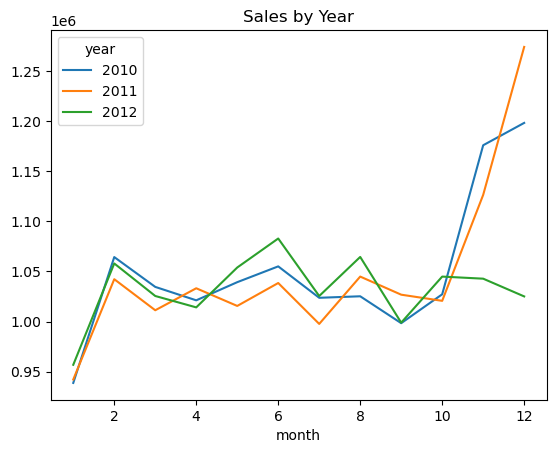

In [70]:
monthly_sales = pd.pivot_table(wm, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()
plt.title('Sales by Year')
plt.show()


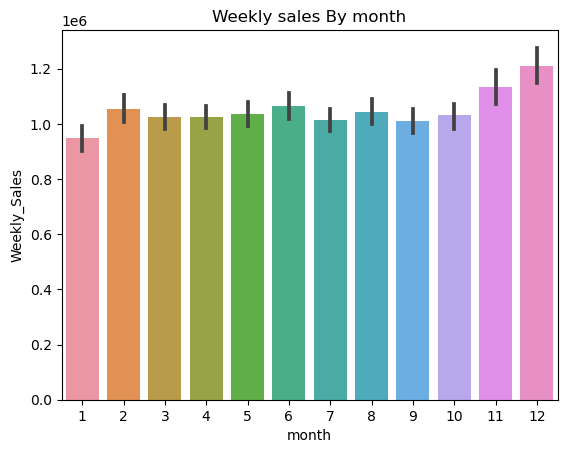

In [71]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=wm)
plt.title('Weekly sales By month')
plt.show()

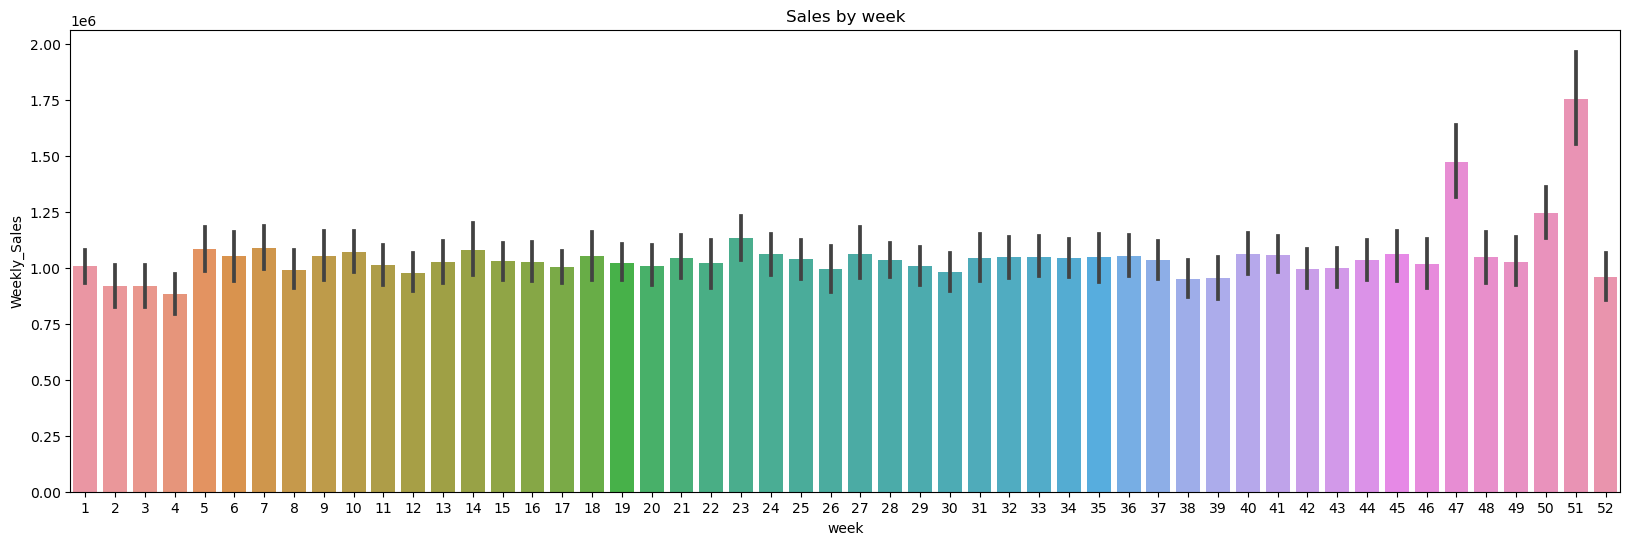

In [72]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=wm)
plt.title('Sales by week')
plt.show()

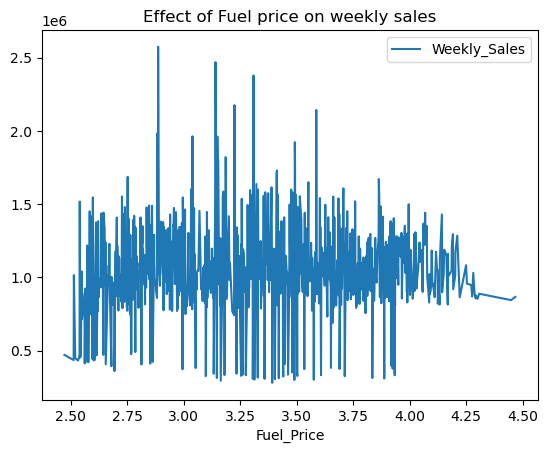

In [73]:
fuel_price = pd.pivot_table(wm, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()
plt.title('Effect of Fuel price on weekly sales')
plt.show(
)

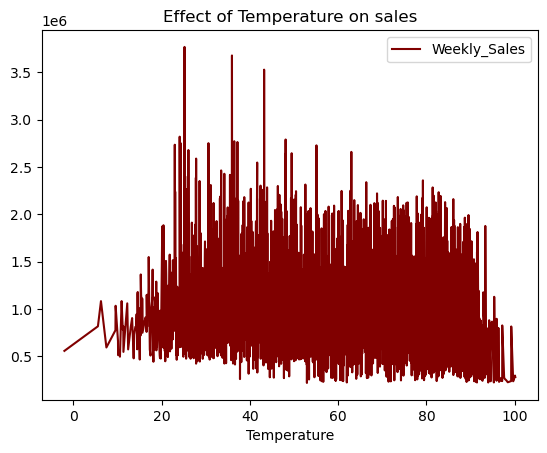

In [78]:
temp = pd.pivot_table(wm, values = "Weekly_Sales", index= "Temperature")
temp.plot(color='maroon')
plt.title('Effect of Temperature on sales')
plt.show()


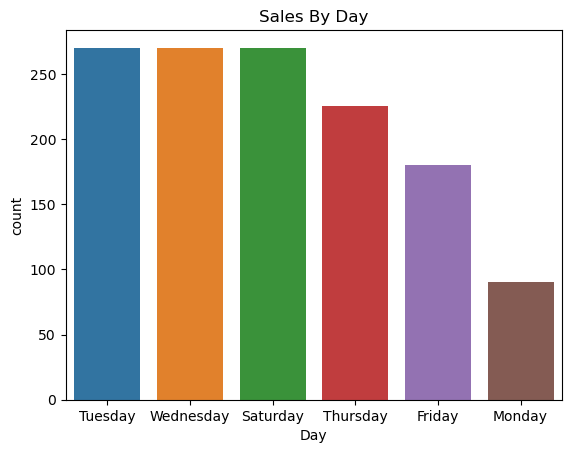

In [83]:
# plt.figure(figsize=(8,4))
sns.countplot(wm['Day'],order=wm['Day'].value_counts().index)
plt.title('Sales By Day')
plt.show()

Text(0.5, 1.0, 'Annual Sales')

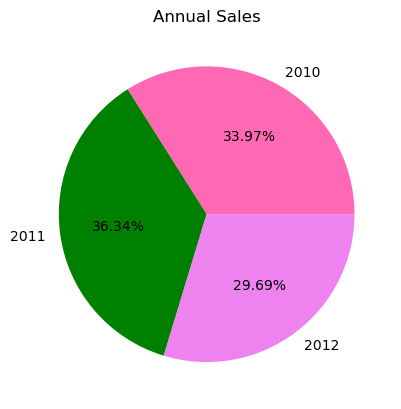

In [85]:
plt.pie(wm.groupby('year')['Weekly_Sales'].sum(),labels=wm['year'].unique(),normalize=True,autopct='%1.2f%%',colors=['hotpink','green','violet'])
plt.title('Annual Sales')

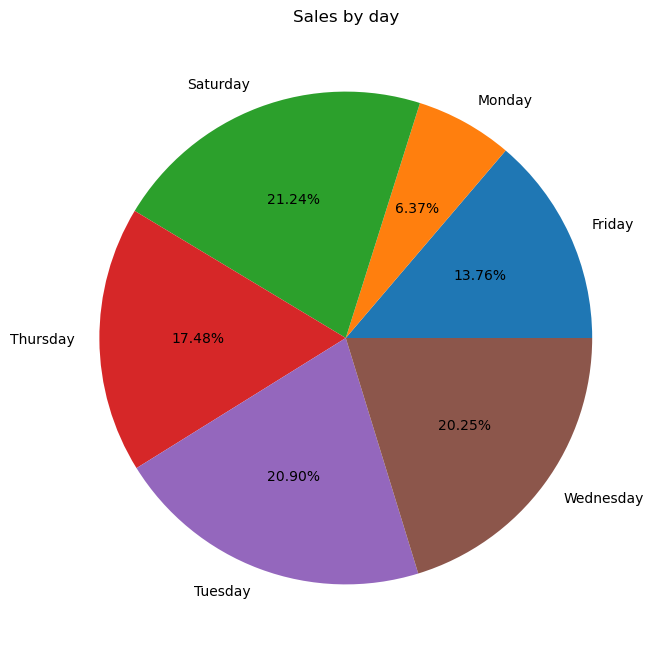

In [87]:
df2 = wm.groupby('Day')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(10,8))
plt.pie(df2['Weekly_Sales'],labels= df2['Day'],autopct='%1.2f%%', normalize=True)
plt.title('Sales by day')
plt.show()

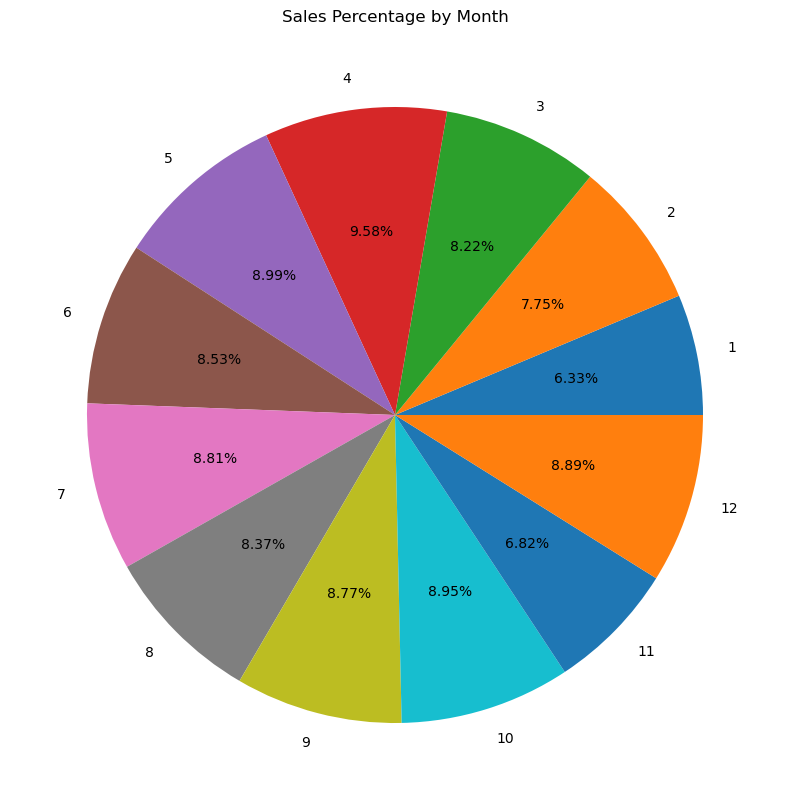

In [91]:

plt.figure(figsize=(10,10))
df3 = wm.groupby('month')['Weekly_Sales'].sum().reset_index()
plt.pie(df3['Weekly_Sales'],labels=df3['month'],normalize=True,autopct='%1.2f%%')
plt.title('Sales Percentage by Month')
plt.show()

In [92]:
df_weeks = data.groupby('week').sum()

import plotly.express as px
fig = px.line( data_frame = df_weeks, x = df_weeks.index, y = 'Weekly_Sales', labels = {'Weekly_Sales' : 'Weekly Sales', 'x' : 'Weeks' }, title = 'Sales over weeks')
fig.update_traces(line_color='deeppink', line_width=3)

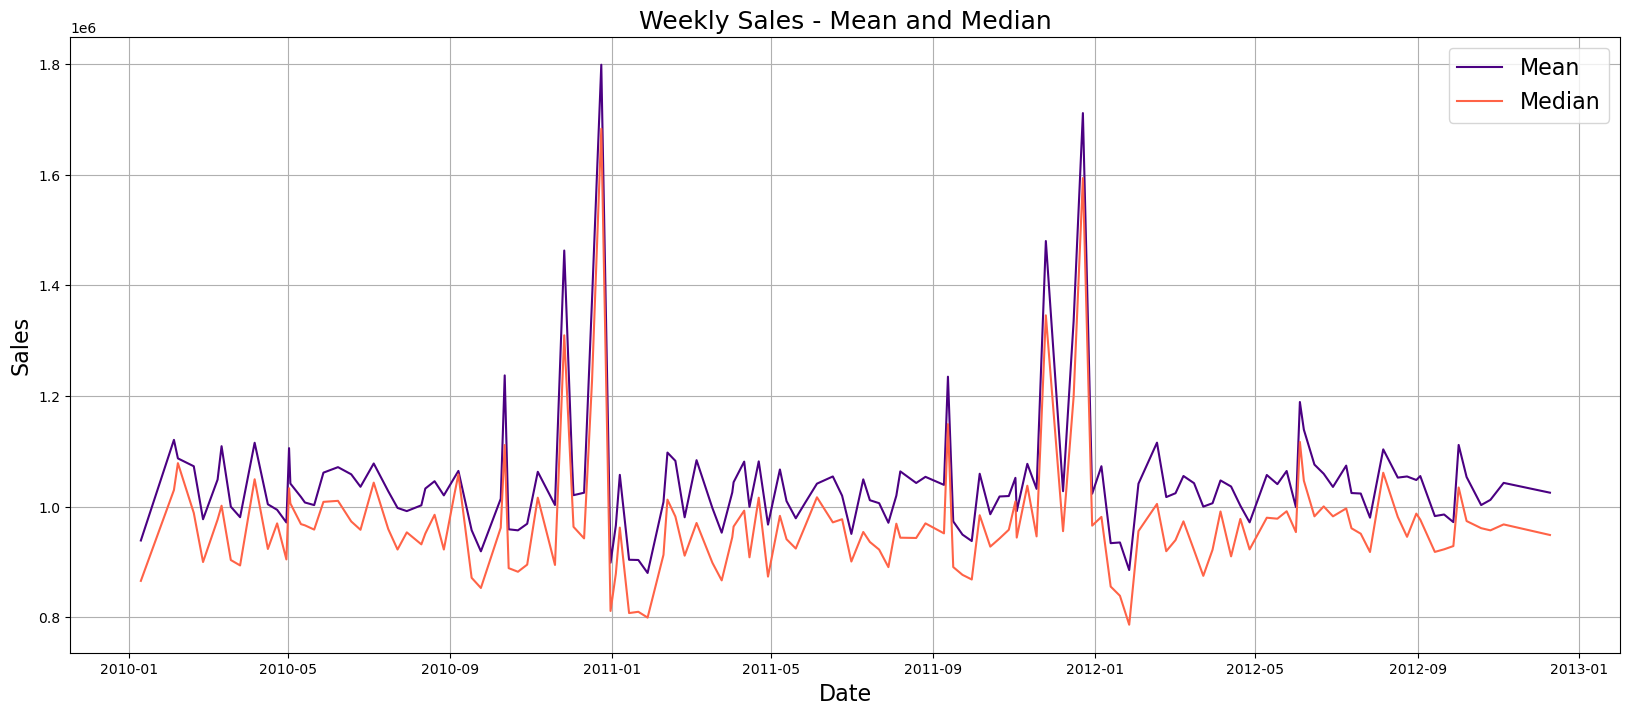

In [93]:
weekly_sales_mean = data['Weekly_Sales'].groupby(data['Date']).mean()
weekly_sales_median = data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_mean.index, weekly_sales_mean.values, color = 'indigo')
sns.lineplot(weekly_sales_median.index, weekly_sales_median.values, color = 'tomato')
plt.grid()
plt.legend(['Mean', 'Median'], loc='best', fontsize=16)
plt.title('Weekly Sales - Mean and Median', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [95]:
# Top 5 Stores with highest sales
total_sales = wm.groupby('Store')['Weekly_Sales'].sum()
top_5_stores = total_sales.nlargest(5)

print(top_5_stores)


Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


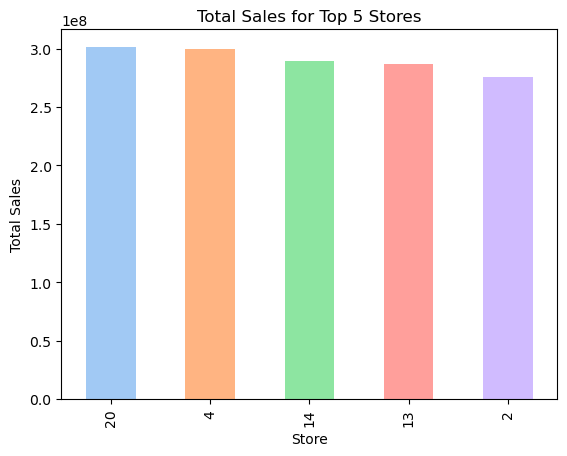

In [99]:
top_5_stores.plot(kind='bar',color=sns.color_palette('pastel'))
plt.title('Total Sales for Top 5 Stores')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()

In [134]:
corr = wm.corr()

Text(0.5, 1.0, 'Correlation Matrix')

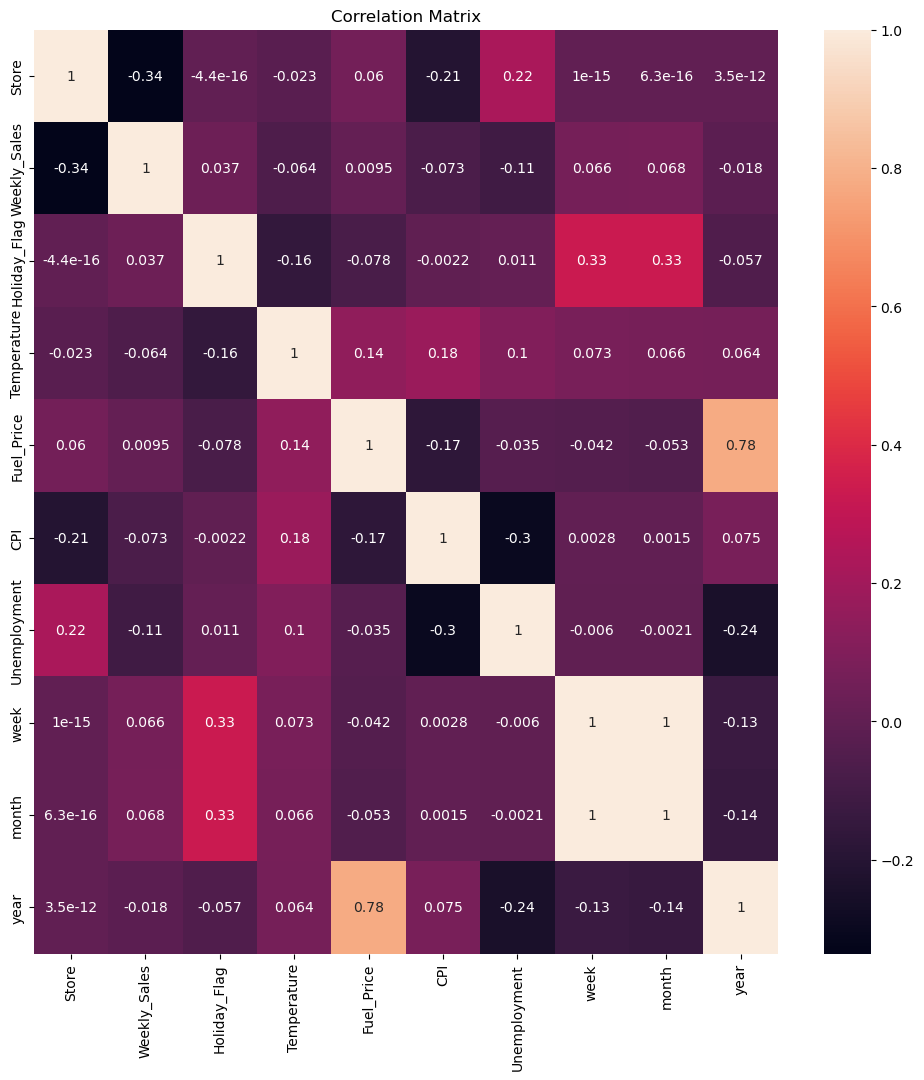

In [139]:
plt.figure(figsize=(12,12))
sns.heatmap(wm.corr(),annot=True)
plt.title('Correlation Matrix')

Most of what we see in the correlation table is of little surprise. Discounts are correlated and higher unemployment means lower Consumer Price Index. More interestingly, it appears that higher department numbers have higher sales. Maybe because they are newer? Also, larger stores generate more sales, discounts generally generate higher sales values and larger unemployment result in a bit fewer sales. Unfortunately, there appears to be little relationship between holidays, temperatures or fuelprices with our weekly sales.

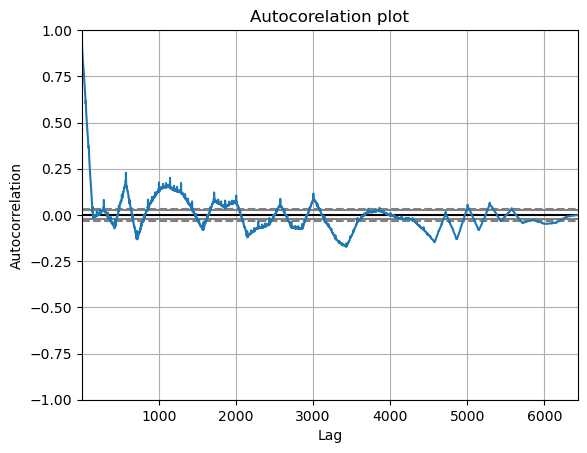

In [141]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(wm['Weekly_Sales'])
plt.title('Autocorelation plot')
plt.show()

In [142]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

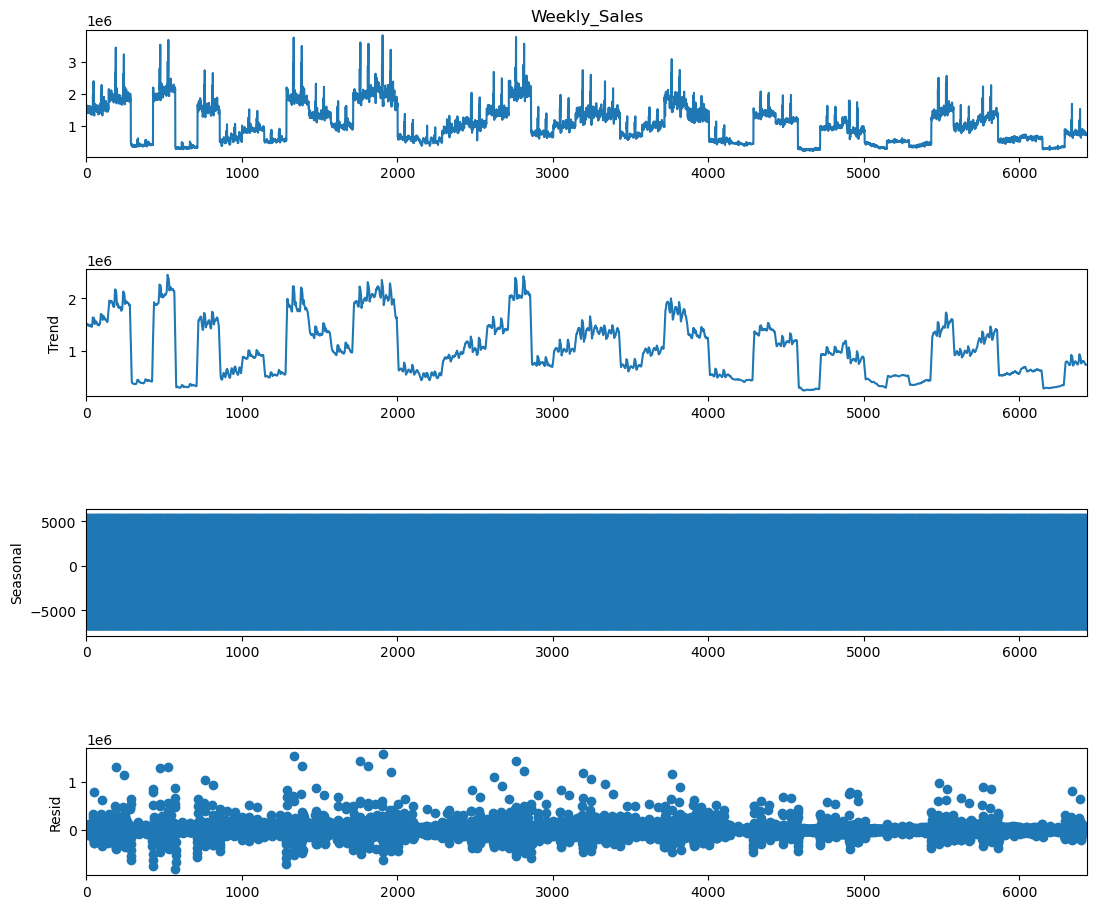

In [145]:
decomposition = seasonal_decompose(wm.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

This code will decompose your time series into its trend, seasonal, and residual components and plot them for you to see. The trend component is calculated using a moving average of the data.

The seasonal_decompose function from the statsmodels library that you used in your previous message automatically decomposes a time series into its trend, seasonal, and residual components. The trend component is calculated using a moving average (or moving median) of the data, which can be thought of as a way to estimate the mean of the time series at each point in time.